In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
X_points = np.random.randint(1,20,20)
y_points = np.random.randint(80,120,20)

In [43]:
X_points , y_points

(array([ 1, 19,  1, 16, 16, 19, 18, 15,  7, 13, 15,  1, 11, 14, 11, 16, 12,
        11,  7,  8], dtype=int32),
 array([ 80,  87,  81,  80, 116,  80, 105,  81,  86, 119,  97, 107,  88,
         96,  85,  80,  95,  87,  90, 103], dtype=int32))

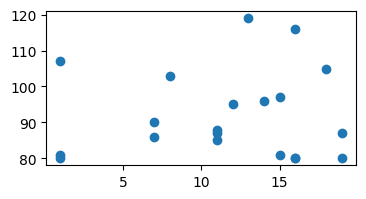

In [44]:
plt.figure(figsize=(4,2))
plt.scatter(X_points,y_points)
plt.show()

In [45]:
mymodel = np.poly1d(np.polyfit(X_points,y_points,3))

In [46]:
myline = np.linspace(1,20,1000)

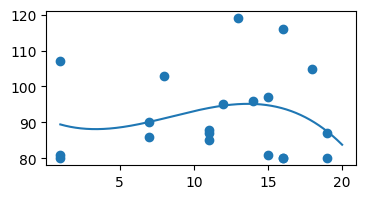

In [47]:
plt.figure(figsize=(4,2))
plt.scatter(X_points,y_points)
plt.plot(myline,mymodel(myline))
plt.show()

In [48]:
mymodel(5)

np.float64(88.59043902204643)

In [49]:
df = pd.read_csv(r"C:\Users\dell\Downloads\shopping_trends.csv").ffill()
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [50]:
pbi = df.groupby(['Item Purchased']).agg({'Purchase Amount (USD)':'sum'}).reset_index()

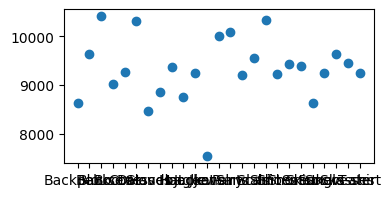

In [51]:
plt.figure(figsize=(4,2))
plt.scatter(pbi['Item Purchased'],pbi['Purchase Amount (USD)'])
plt.show()            

In [52]:
df.shape

(3900, 19)

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
en = LabelEncoder()

In [56]:
df['Item Purchased'] = en.fit_transform(df['Item Purchased'])

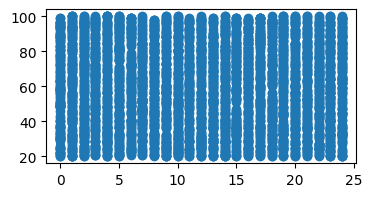

In [57]:
plt.figure(figsize=(4,2))
plt.scatter(df['Item Purchased'],df['Purchase Amount (USD)'])
plt.show()

In [58]:
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,2,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,23,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,11,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [67]:
X = pd.DataFrame(df['Item Purchased']+df['Purchase Amount (USD)']).reset_index()


In [68]:
X

,index,0
0,0,55
1,1,87
2,2,84
3,3,104
4,4,51
...,...,...
3895,3895,37
3896,3896,49
3897,3897,34
3898,3898,94


In [69]:
y = df['Review Rating']

In [70]:
X.columns = X.columns.astype(str)

In [71]:
X.columns

Index(['index', '0'], dtype='object')

In [72]:
lr.fit(X,y)

LinearRegression()

In [73]:
t = {
    'index':[22,5],
    '0':[67,34]
}

In [74]:
t

{'index': [22, 5], '0': [67, 34]}

In [75]:
X_test = pd.DataFrame(t)

In [76]:
X_test

,index,0
0,22,67
1,5,34


In [77]:
lr.predict(X_test)

array([3.74479145, 3.71788111])